In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from collections import Counter
import re
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import numpy
import keras.models
import tensorflow
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense
import unidecode


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#!pip install unidecode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Data/cleaned_dataset_train.csv'
df = pd.read_csv(path)

In [ ]:
df.shape

(31962, 6)

In [ ]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet,Hashtags
0,0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,2,3,0,bihday your majesty,bihday majesti,No hashtags
3,3,4,0,#model i love u take with u all the time in ...,#model love take time urd+-!!! dddd d|d|d|,#model
4,4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [ ]:
df = df.drop(labels= ['id','Unnamed: 0','Hashtags'],axis=1)

In [ ]:
##df[df["clean_tweet"].notnull()]
df['clean_tweet'].fillna(' ')

0        father dysfunct selfish drag kid dysfunction. ...
1        thank #lyft credit can't use caus offer wheelc...
2                                           bihday majesti
3               #model love take time urd+-!!! dddd d|d|d|
4                               factsguide: societi #motiv
                               ...                        
31957                         ate isz youuu?ddddddddda$?i,
31958    see nina turner airwav tri wrap mantl genuin h...
31959             listen sad song monday morn otw work sad
31960     #sikh #templ vandalis #calgary, #wso condemn act
31961                                         thank follow
Name: clean_tweet, Length: 31962, dtype: object

In [ ]:
df['clean_tweet'].isna().sum()

11

In [ ]:
df['clean_tweet'].fillna('Null',inplace=True)

In [ ]:

df['clean_tweet'].isna().sum()

0

In [ ]:
df.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...
2,0,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,#model love take time urd+-!!! dddd d|d|d|
4,0,factsguide: society now #motivation,factsguide: societi #motiv


In [ ]:
type(df['clean_tweet'].values)

numpy.ndarray

In [ ]:
def cou():
  if df['label']== 0:
  return i=i+1



IndentationError: ignored

#**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, Y_train, Y_test = train_test_split( df['clean_tweet'].values, df['label'].values, random_state=42, stratify=df['label'].values)
                                                    
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape                            

((23971,), (7991,), (23971,), (7991,))

In [ ]:
import numpy as np
X_train


# **Bag Of words**

In [ ]:
df['clean_tweet'].isna().sum()

0

In [ ]:
corpus = []
for i in range(X_train.shape[0]):
    corpus.append(X_train[i])

len(corpus)

23971

In [ ]:
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = vectorizer.fit_transform(X_train)  ##The input to fit_transform should be a list of strings. 
bow.shape

(23971, 1000)

# **Term frequency inverse document frequency**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X_train)
tfidf.shape

(23971, 1000)

### To create a function which checks which model is better

In [ ]:
def Model(model,Input,Output,TestInput,TestOutput):
  clf = model
  clf.fit(Input,Output)
  test_prediction = clf.predict(TestInput)
  print(metrics.classification_report(y_true= TestOutput, y_pred= test_prediction))
  sns.heatmap(metrics.confusion_matrix(y_true = TestOutput, y_pred = test_prediction),fnt = 'd',annot = True)

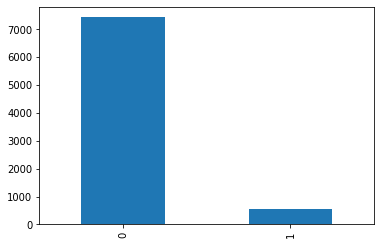

In [ ]:
pd.Series(Y_test).value_counts().plot(kind = 'bar')

#This bar plot shows that the count of negative tweets(racist/sexist comments) is less.

# **Building Deep Neural Networks**

In [ ]:
X_test

array([[   0,    0,    0, ...,   13,   30,  342],
       [   0,    0,    0, ..., 1294,   39, 1179],
       [   0,    0,    0, ...,  244,  244,  244],
       ...,
       [   0,    0,    0, ...,  297,  514,  667],
       [   0,    0,    0, ...,  225, 1514, 1585],
       [   0,    0,    0, ...,  307,  212,  233]], dtype=int32)

In [ ]:
X_train

array(['like spread peanut butter white bread! #littlewond',
       "watch made america o.j. simpson..... 30for30.... far interesting...... went 60' still go 2016.",
       'franci underwood seen leav marseil #nojok', ...,
       'kudo compliant :) #itaxnirahisi',
       '#streetautopia attack bull game 3d: realli think head empti around city. si',
       '6pm'], dtype=object)

In [ ]:
##Tokenize the data
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 2000, lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 33156 unique tokens.


In [ ]:
##To get the length of the largest review
lengths= []
for i in range(0,len(X_train)):
  lengths.append(len(X_train[i]))
max(lengths)

193

In [ ]:
X = tokenizer.texts_to_sequences(X_train)
X[0]

[15, 1731, 156]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X ,maxlen = 193)

In [ ]:
print('Shape of data tensor:',X.shape)

Shape of data tensor: (23971, 193)


# **Simple LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import seaborn as sns

##import LSTM, time #helper libraries

In [ ]:
model = Sequential()
model.add(Embedding(20000,100,input_length= X.shape[1]))
model.add( Dropout(0.2))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 193, 100)          2000000   
_________________________________________________________________
dropout_10 (Dropout)         (None, 193, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 2,080,501
Trainable params: 2,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X, Y_train, epochs=5, batch_size=32 , validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 19176 samples, validate on 4795 samples
Epoch 1/5
19176/19176 [==============================] - 113s 6ms/step - loss: 0.1899 - accuracy: 0.9407 - val_loss: 0.1432 - val_accuracy: 0.9527
Epoch 2/5
19176/19176 [==============================] - 110s 6ms/step - loss: 0.1207 - accuracy: 0.9569 - val_loss: 0.1460 - val_accuracy: 0.9525
Epoch 3/5
19176/19176 [==============================] - 113s 6ms/step - loss: 0.1042 - accuracy: 0.9617 - val_loss: 0.1424 - val_accuracy: 0.9529
Epoch 4/5
19176/19176 [==============================] - 114s 6ms/step - loss: 0.0928 - accuracy: 0.9656 - val_loss: 0.1544 - val_accuracy: 0.9537
Epoch 5/5
19176/19176 [==============================] - 116s 6ms/step - loss: 0.0804 - accuracy: 0.9704 - val_loss: 0.1606 - val_accuracy: 0.9504


#Preprocess the test data to predict labels


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test , maxlen = 193)
test_prediction = model.predict_classes(X_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7430
           1       0.71      0.51      0.60       561

    accuracy                           0.95      7991
   macro avg       0.84      0.75      0.78      7991
weighted avg       0.95      0.95      0.95      7991



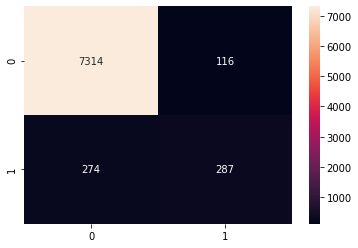

In [ ]:
print(metrics.classification_report(Y_test, test_prediction)) 
sns.heatmap(metrics.confusion_matrix(Y_test, test_prediction), fmt='d',annot = True)                ##confusion matrix recall gets imp

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1,batch_size = 256)
print("Accuracy: %.2f%%" % (scores[1]*100))

7991/7991 [==============================] - 8s 1ms/step
Accuracy: 95.12%


In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

print("Precision:", precision_score(Y_test, test_prediction))
print("Recall:",recall_score(Y_test, test_prediction))
print("F1 Score:",f1_score(Y_test,test_prediction))

Precision: 0.7121588089330024
Recall: 0.5115864527629234
F1 Score: 0.5954356846473028


In [ ]:
model.save('lstm')
#from keras.models import load_model
# load model from single file
#model = load_model('lstm_model.h5')

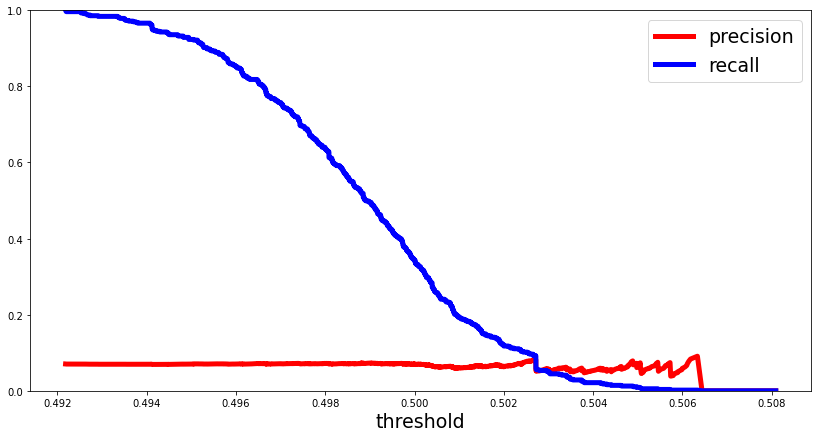

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = model.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)            #[:-1]
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)

In [ ]:
NS = [0 for _ in range(len(Y_test))]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores
ns_auc = roc_auc_score(Y_test, NS)
lr_auc = roc_auc_score(Y_test, y_scores)

In [ ]:
#It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


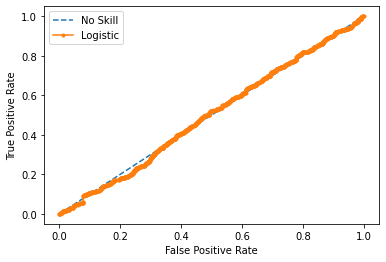

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, NS)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, y_scores)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_test, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.4996222617273999


ignore~~# **LSTM & Convolutional Neural Networks**

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
model2 = Sequential()
model2.add(Embedding(2000,150,input_length=X.shape[1]))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


Using TensorFlow backend.


NameError: ignored

In [ ]:
#model2.add(Dropout(0.2))

In [ ]:
#model2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [ ]:
#model2.add(MaxPooling1D(pool_size=2))

In [ ]:
#model2.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))

In [ ]:
#model2.add(Dense(1,activation = 'sigmoid'))

In [ ]:
#model2.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [ ]:
#print(model2.summary()) 

In [ ]:
#model2.fit(X, Y_train,epochs = 7, batch_size= 32, validation_split= 0.2)

In [ ]:
#test_prediction2 = model2.predict_classes(X_test)

In [ ]:
#print(metrics.classification_report(Y_test,test_prediction2))

In [ ]:
#sns.heatmap(metrics.confusion_matrix(Y_test,test_prediction2),fmt= 'd', annot = True)